### activate venv called env

In [1]:
#ISE_venv\Scripts\activate
#deactivate

# Start

In [25]:
import datetime
import os
import cv2
from deep_sort_realtime.deepsort_tracker import DeepSort
from roboflow import Roboflow
import numpy as np
import utils as utils_maurice

CONFIDENCE_THRESHOLD = 0.8
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)

# initialize the video capture object
video_cap = cv2.VideoCapture("data\\clips\\08fd33_4.mp4")

# initialize the video writer object
writer = utils_maurice.create_video_writer(video_cap, "data\\clips\\output.mp4")

# load the pre-trained YOLOv8n model
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model

# initalize tracker
tracker = DeepSort(max_age=5)

while True:
    start = datetime.datetime.now()

    ret, frame = video_cap.read()

    if not ret:
        break

    # DETECTION
    detections = model.predict(frame, confidence=40, overlap=30).json()['predictions']

    results = []

    for entry in detections:
        x = entry['x']
        y = entry['y']
        width = entry['width']
        height = entry['height']
        class_id = entry['class_id']
        confidence = entry['confidence']

        # filter out weak detections by ensuring the 
        # confidence is greater than the minimum confidence
        # if float(confidence) < CONFIDENCE_THRESHOLD:
        #   continue

        # add the bounding box (x, y, w, h), confidence and class id to the results list
        results.append([[x, y, width, height], confidence, int(class_id)])

    # TRACKING
    # update the tracker with the new detections
    tracks = tracker.update_tracks(results, frame=frame)

    # loop over the tracks
    for track in tracks:
        # if the track is not confirmed, ignore it
        if not track.is_confirmed():
            continue

        # get the track id and the bounding box
        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = int(ltrb[0]), int(
            ltrb[1]), int(ltrb[2]), int(ltrb[3])
        # draw the bounding box and the track id
        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
        cv2.rectangle(frame, (xmin, ymin - 2), (xmin + 2, ymin), GREEN, -1)
        cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, WHITE, 2)

    # end time to compute the fps
    end = datetime.datetime.now()
    # show the time it took to process 1 frame
    print(f"Time to process 1 frame: {(end - start).total_seconds() * 1000:.0f} milliseconds")
    # calculate the frame per second and draw it on the frame
    fps = f"FPS: {1 / (end - start).total_seconds():.2f}"
    cv2.putText(frame, fps, (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 8)

    # write the frame to the output video
    writer.write(frame)

# release resources
video_cap.release()
writer.release()
cv2.destroyAllWindows()

loading Roboflow workspace...
loading Roboflow project...
Time to process 1 frame: 2086 milliseconds
Time to process 1 frame: 1755 milliseconds
Time to process 1 frame: 1732 milliseconds
Time to process 1 frame: 1728 milliseconds
Time to process 1 frame: 1757 milliseconds
Time to process 1 frame: 1405 milliseconds
Time to process 1 frame: 1779 milliseconds
Time to process 1 frame: 1782 milliseconds
Time to process 1 frame: 1153 milliseconds
Time to process 1 frame: 1287 milliseconds
Time to process 1 frame: 1131 milliseconds
Time to process 1 frame: 1218 milliseconds
Time to process 1 frame: 1229 milliseconds
Time to process 1 frame: 1176 milliseconds
Time to process 1 frame: 1278 milliseconds
Time to process 1 frame: 1500 milliseconds
Time to process 1 frame: 1605 milliseconds
Time to process 1 frame: 1455 milliseconds
Time to process 1 frame: 1532 milliseconds
Time to process 1 frame: 1442 milliseconds
Time to process 1 frame: 1511 milliseconds
Time to process 1 frame: 2056 milliseco

### below version improves positioning of box

In [2]:
import datetime
import os
import cv2
from deep_sort_realtime.deepsort_tracker import DeepSort
from roboflow import Roboflow
import numpy as np
import utils as utils_maurice

CONFIDENCE_THRESHOLD = 0.8
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)

# initialize the video capture object
video_cap = cv2.VideoCapture("data\\clips\\08fd33_4.mp4")

# initialize the video writer object
writer = utils_maurice.create_video_writer(video_cap, "data\\clips\\output.mp4")

# load the pre-trained YOLOv8n model
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model

# initalize tracker
tracker = DeepSort(max_age=5)

while True:
    start = datetime.datetime.now()

    ret, frame = video_cap.read()

    if not ret:
        break

    # DETECTION
    detections = model.predict(frame, confidence=40, overlap=30).json()['predictions']

    results = []

    for entry in detections:
        x = entry['x']
        y = entry['y']
        width = entry['width']
        height = entry['height']
        class_id = entry['class_id']
        confidence = entry['confidence']

        # filter out weak detections by ensuring the 
        # confidence is greater than the minimum confidence
        #if float(confidence) < CONFIDENCE_THRESHOLD:
        #    continue

        # add the bounding box (x, y, w, h), confidence, and class id to the results list
        results.append([[x, y, width, height], confidence, int(class_id)])

    # TRACKING
    # update the tracker with the new detections
    tracks = tracker.update_tracks(results, frame=frame)

    # loop over the tracks
    for track in tracks:
        # if the track is not confirmed, ignore it
        if not track.is_confirmed():
            continue

        # get the track id and the bounding box
        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = map(int, ltrb)
        
        # Calculate the width and height of the bounding box
        width = xmax - xmin
        height = ymax - ymin

        # Adjust the coordinates to have the bounding box centered on the object
        xmin = max(0, xmin - width // 2)
        ymin = max(0, ymin - height // 2)
        xmax = min(frame.shape[1], xmax + width // 2)
        ymax = min(frame.shape[0], ymax + height // 2)

        # draw the bounding box and the track id
        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
        cv2.rectangle(frame, (xmin, ymin), (xmin, ymin), GREEN, -1)
        cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, WHITE, 2)

    # end time to compute the fps
    end = datetime.datetime.now()
    # show the time it took to process 1 frame
    # calculate the frame per second and draw it on the frame
    fps = f"FPS: {1 / (end - start).total_seconds():.2f}"
    cv2.putText(frame, fps, (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 8)

    # Display the frame with bounding boxes using cv2.imshow()
    cv2.imshow("Video with Bounding Boxes", frame)
    cv2.waitKey(1)  # Adjust the delay (1 millisecond here) based on your preference

    # write the frame to the output video
    writer.write(frame)

# release resources
video_cap.release()
writer.release()
cv2.destroyAllWindows()

loading Roboflow workspace...
loading Roboflow project...


## save the infos for Phuc

In [1]:
import datetime
import os
import cv2
import json
from deep_sort_realtime.deepsort_tracker import DeepSort
from roboflow import Roboflow
import numpy as np
import utils as utils_maurice

CONFIDENCE_THRESHOLD = 0.8
GREEN = (0, 255, 0)
WHITE = (255, 255, 255)

# initialize the video capture object
video_cap = cv2.VideoCapture("data\\clips\\08fd33_4.mp4")

# initialize the video writer object
writer = utils_maurice.create_video_writer(video_cap, "data\\clips\\output.mp4")

# load the pre-trained YOLOv8n model
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model

# initialize tracker
tracker = DeepSort(max_age=5)

# List to store bounding box and track id for each frame
output_data = []

while True:
    start = datetime.datetime.now()

    ret, frame = video_cap.read()

    if not ret:
        break

    # DETECTION
    detections = model.predict(frame, confidence=40, overlap=30).json()['predictions']

    results = []

    for entry in detections:
        x = entry['x']
        y = entry['y']
        width = entry['width']
        height = entry['height']
        class_id = entry['class_id']
        confidence = entry['confidence']

        results.append([[x, y, width, height], confidence, int(class_id)])

    # TRACKING
    # update the tracker with the new detections
    tracks = tracker.update_tracks(results, frame=frame)

    frame_data = []  # List to store bounding box and track id for the current frame

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        ltrb = track.to_ltrb()

        xmin, ymin, xmax, ymax = map(int, ltrb)
        
        width = xmax - xmin
        height = ymax - ymin

        xmin = max(0, xmin - width // 2)
        ymin = max(0, ymin - height // 2)
        xmax = min(frame.shape[1], xmax + width // 2)
        ymax = min(frame.shape[0], ymax + height // 2)

        frame_data.append({"bounding_box": [xmin, ymin, xmax, ymax], "track_id": track_id})

        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), GREEN, 2)
        cv2.rectangle(frame, (xmin, ymin), (xmin, ymin), GREEN, -1)
        cv2.putText(frame, str(track_id), (xmin + 5, ymin - 8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, WHITE, 2)

    output_data.append(frame_data)

    end = datetime.datetime.now()
    fps = f"FPS: {1 / (end - start).total_seconds():.2f}"
    cv2.putText(frame, fps, (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 8)

    cv2.imshow("Video with Bounding Boxes", frame)
    cv2.waitKey(1)

    writer.write(frame)

# release resources
video_cap.release()
writer.release()
cv2.destroyAllWindows()

# Save the output data to a JSON file

output_file_path = "C:\\Users\\mauri\\Documents\\Github\ISE\\output\\per_frame_boxes_ID.json"
with open(output_file_path, 'w') as output_file:
    json.dump(output_data, output_file)

print(f"Output data saved to {output_file_path}")

loading Roboflow workspace...
loading Roboflow project...
Output data saved to C:\Users\mauri\Documents\Github\ISE\output\per_frame_boxes_ID.json


# Playground for Dev

In [2]:
import datetime
import os
import cv2
from deep_sort_realtime.deepsort_tracker import DeepSort
from roboflow import Roboflow
import numpy as np
import utils as utils_maurice

In [3]:
root = os.getcwd()
print(root)
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model
SOURCE_VIDEO_PATH = "C:\\Users\\mauri\\Documents\\Github\\ISE\\data\\clips\\08fd33_4.mp4"
frame_iterator = iter(utils_maurice.generate_frames(video_file=SOURCE_VIDEO_PATH))
frame = next(frame_iterator)
results = model.predict(frame, confidence=40, overlap=30).json()['predictions']
results

c:\Users\mauri\Documents\Github\ISE
loading Roboflow workspace...
loading Roboflow project...


[{'x': 1408.0,
  'y': 860.5,
  'width': 50.0,
  'height': 89.0,
  'confidence': 0.8042841553688049,
  'class': 'player',
  'class_id': 1,
  'image_path': array([[[100, 146, 105],
          [ 92, 138,  97],
          [ 97, 150, 101],
          ...,
          [100,  92,  82],
          [103,  95,  85],
          [105,  97,  87]],
  
         [[ 99, 145, 104],
          [ 99, 145, 104],
          [109, 162, 113],
          ...,
          [105,  97,  87],
          [107,  99,  89],
          [108, 100,  90]],
  
         [[ 96, 149, 100],
          [105, 158, 109],
          [112, 170, 113],
          ...,
          [106,  98,  88],
          [108, 100,  90],
          [110, 102,  92]],
  
         ...,
  
         [[ 74, 103,  78],
          [ 74, 103,  78],
          [ 74, 103,  78],
          ...,
          [ 30,  47,  43],
          [ 31,  48,  44],
          [ 31,  48,  44]],
  
         [[ 74, 103,  78],
          [ 74, 103,  78],
          [ 74, 103,  78],
          ...,
          [

In [ ]:
root = os.getcwd()
print(root)
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model
SOURCE_VIDEO_PATH = "C:\\Users\\mauri\\Documents\\Github\\ISE\\data\\clips\\08fd33_4.mp4"
frame_iterator = iter(utils_maurice.generate_frames(video_file=SOURCE_VIDEO_PATH))

root = os.getcwd()
print(root)
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model
SOURCE_VIDEO_PATH = "C:\\Users\\mauri\\Documents\\Github\\ISE\\data\\clips\\08fd33_4.mp4"
frame_iterator = iter(utils_maurice.generate_frames(video_file=SOURCE_VIDEO_PATH))
frame = next(frame_iterator)
results = model.predict(frame, confidence=40, overlap=30).json()['predictions']


result = []  # Initialize an empty list to store the transformed results

for entry in results:
    # Extract values from the current dictionary
    x = entry['x']
    y = entry['y']
    width = entry['width']
    height = entry['height']
    confidence = entry['confidence']
    class_id = entry['class_id']
    
    # Extract 'class' if present, otherwise use a default value
    class_name = entry.get('class', f'Class_{class_id}')

    # Convert class_id to an integer
    class_id = int(class_id)

    # Append a new dictionary to the result list with the transformed values
    result.append({
        'x': float(x),
        'y': float(y),
        'width': float(width),
        'height': float(height),
        'class_id': class_id,
        'class_name': class_name,
        'confidence': float(confidence)
    })


# alt

In [2]:
root = os.getcwd()
print(root)

c:\Users\mauri\Documents\Github\ISE


### Call the pre-trained model

In [3]:
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model

loading Roboflow workspace...
loading Roboflow project...


In [4]:
SOURCE_VIDEO_PATH = "C:\\Users\\mauri\\Documents\\Github\\ISE\\data\\clips\\08fd33_4.mp4"

In [5]:
frame_iterator = iter(utils_maurice.generate_frames(video_file=SOURCE_VIDEO_PATH))

In [36]:
frame = next(frame_iterator)


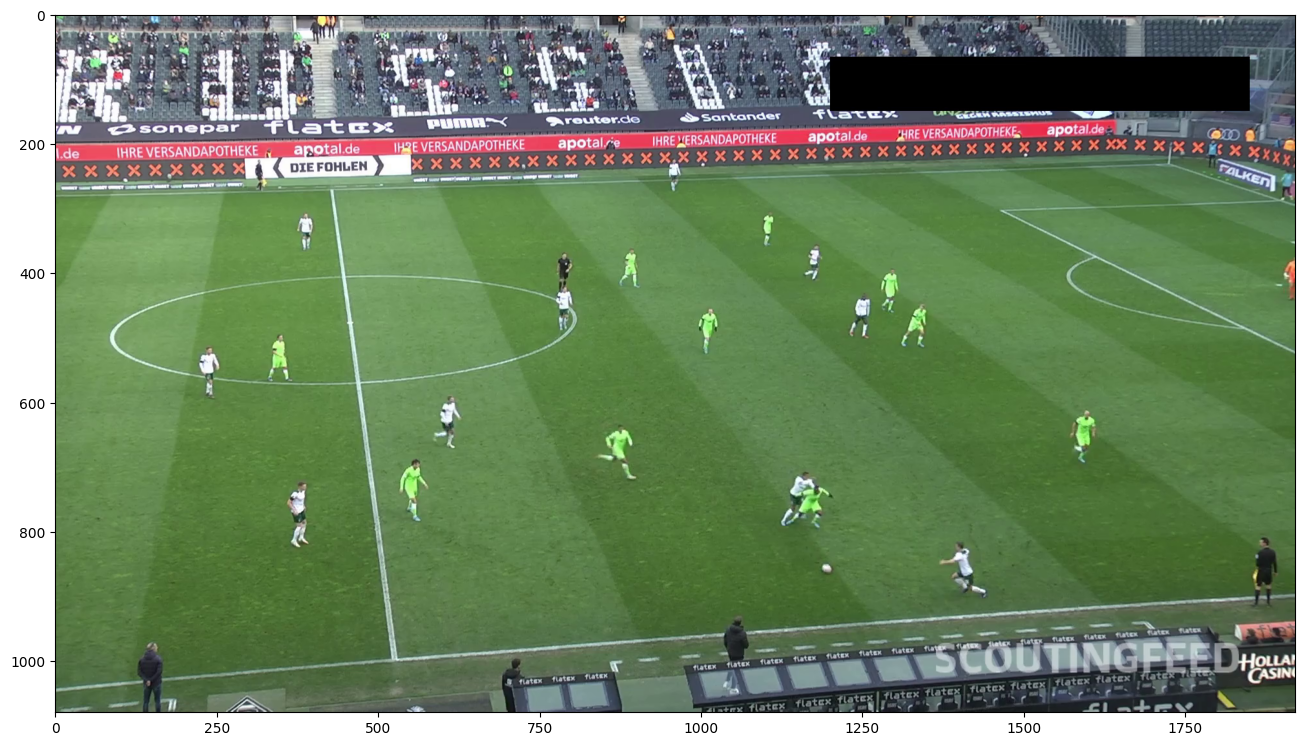

In [37]:
utils_maurice.plot_image(frame, 16)

In [38]:
results = model.predict(frame, confidence=40, overlap=30).json()

In [39]:
results['predictions']

[{'x': 1408.0,
  'y': 860.5,
  'width': 50.0,
  'height': 89.0,
  'confidence': 0.8042841553688049,
  'class': 'player',
  'class_id': 1,
  'image_path': array([[[100, 146, 105],
          [ 92, 138,  97],
          [ 97, 150, 101],
          ...,
          [100,  92,  82],
          [103,  95,  85],
          [105,  97,  87]],
  
         [[ 99, 145, 104],
          [ 99, 145, 104],
          [109, 162, 113],
          ...,
          [105,  97,  87],
          [107,  99,  89],
          [108, 100,  90]],
  
         [[ 96, 149, 100],
          [105, 158, 109],
          [112, 170, 113],
          ...,
          [106,  98,  88],
          [108, 100,  90],
          [110, 102,  92]],
  
         ...,
  
         [[ 74, 103,  78],
          [ 74, 103,  78],
          [ 74, 103,  78],
          ...,
          [ 30,  47,  43],
          [ 31,  48,  44],
          [ 31,  48,  44]],
  
         [[ 74, 103,  78],
          [ 74, 103,  78],
          [ 74, 103,  78],
          ...,
          [

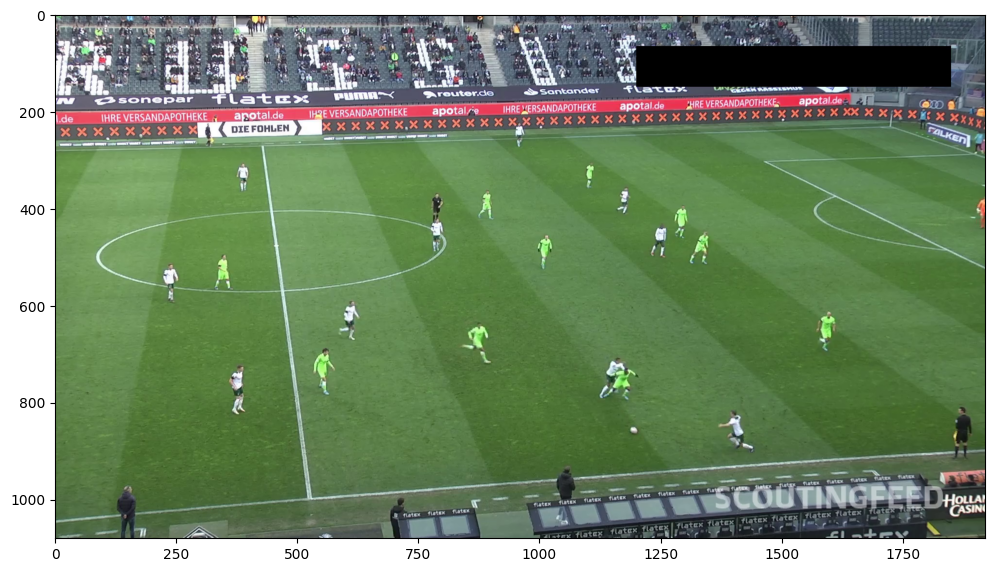

TypeError: tuple indices must be integers or slices, not tuple

In [10]:
import cv2
import numpy as np
from deep_sort.deep_sort import nn_matching
from deep_sort.deep_sort.detection import Detection
from deep_sort.deep_sort.tracker import Tracker
import utils as utils_maurice
import matplotlib.pyplot as plt

# Initialize Deep SORT tracker components
metric = nn_matching.NearestNeighborDistanceMetric("cosine", 0.2)
tracker = Tracker(metric)

SOURCE_VIDEO_PATH = "C:\\Users\\mauri\\Documents\\Github\\ISE\\data\\clips\\08fd33_4.mp4"
frame_iterator = utils_maurice.generate_frames(video_file=SOURCE_VIDEO_PATH)

for frame in frame_iterator:
    # Replace this with your object detection code
    results = model.predict(frame, confidence=40, overlap=30).json()
    
    # Adjust the keys based on the actual structure of your predictions
    detections = [
        Detection(
            [result['x'], result['y'], result['x'] + result['width'], result['y'] + result['height']],
            result['confidence'],
            None  # You can provide the feature if available, otherwise set it to None
        )
        for result in results['predictions']
    ]

    # Update the tracker with the new detections
    tracker.predict()
    tracker.update(detections)

    # Process the tracking results as needed
    # Example: draw bounding boxes
    for track in tracker.tracks:
        if not track.is_confirmed() or track.time_since_update > 1:
            continue
        bbox = track.to_tlwh()  # top left x, top left y, width, height
        track_id = track.track_id

        cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3])), (0, 255, 0), 2)
        cv2.putText(frame, f"ID: {track_id}", (int(bbox[0]), int(bbox[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with tracking information using Matplotlib
    utils_maurice.plot_image(frame)

# No need for cv2.destroyAllWindows() when using Matplotlib


# Graveyard

### tracker-pre-processing

In [13]:
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Tuple, Optional, List, Dict, Any
import cv2
import numpy as np


@dataclass(frozen=True)
class Point:
    x: float
    y: float
    
    @property
    def int_xy_tuple(self) -> Tuple[int, int]:
        return int(self.x), int(self.y)

@dataclass(frozen=True)
class Rect:
    x: float
    y: float
    width: float
    height: float

    @property
    def min_x(self) -> float:
        return self.x
    
    @property
    def min_y(self) -> float:
        return self.y
    
    @property
    def max_x(self) -> float:
        return self.x + self.width
    
    @property
    def max_y(self) -> float:
        return self.y + self.height
        
    @property
    def top_left(self) -> Point:
        return Point(x=self.x, y=self.y)
    
    @property
    def bottom_right(self) -> Point:
        return Point(x=self.x + self.width, y=self.y + self.height)

    @property
    def bottom_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height)

    @property
    def top_center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y)

    @property
    def center(self) -> Point:
        return Point(x=self.x + self.width / 2, y=self.y + self.height / 2)

    def pad(self, padding: float) -> Rect:
        return Rect(
            x=self.x - padding, 
            y=self.y - padding,
            width=self.width + 2*padding,
            height=self.height + 2*padding
        )
    
    def contains_point(self, point: Point) -> bool:
        return self.min_x < point.x < self.max_x and self.min_y < point.y < self.max_y


# detection utilities

@dataclass
class Detection:
    rect: Rect
    class_id: int
    class_name: str
    confidence: float
    tracker_id: Optional[int] = None

    @classmethod
    def from_results(cls, predictions: List[Dict[str, float]]) -> List['Detection']:
        result = []

        for entry in predictions:
            x = entry['x']
            y = entry['y']
            width = entry['width']
            height = entry['height']
            confidence = entry['confidence']
            class_id = entry['class_id']
            class_name = entry.get('class', f'Class_{class_id}')

            class_id = int(class_id)

            result.append(Detection(
                rect=Rect(
                    x=float(x),
                    y=float(y),
                    width=float(width),
                    height=float(height)
                ),
                class_id=class_id,
                class_name=class_name,
                confidence=float(confidence)
            ))

        return result

def filter_detections_by_class(detections: List[Detection], class_name: str) -> List[Detection]:
    return [
        detection
        for detection 
        in detections
        if detection.class_name == class_name
    ]

# draw utilities

@dataclass(frozen=True)
class Color:
    r: int
    g: int
    b: int
        
    @property
    def bgr_tuple(self) -> Tuple[int, int, int]:
        return self.b, self.g, self.r

    @classmethod
    def from_hex_string(cls, hex_string: str) -> Color:
        r, g, b = tuple(int(hex_string[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
        return Color(r=r, g=g, b=b)

def draw_rect(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, thickness)
    return image

def draw_filled_rect(image: np.ndarray, rect: Rect, color: Color) -> np.ndarray:
    cv2.rectangle(image, rect.top_left.int_xy_tuple, rect.bottom_right.int_xy_tuple, color.bgr_tuple, -1)
    return image


def draw_polygon(image: np.ndarray, countour: np.ndarray, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, thickness)
    return image

def draw_filled_polygon(image: np.ndarray, countour: np.ndarray, color: Color) -> np.ndarray:
    cv2.drawContours(image, [countour], 0, color.bgr_tuple, -1)
    return image


def draw_text(image: np.ndarray, anchor: Point, text: str, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.putText(image, text, anchor.int_xy_tuple, cv2.FONT_HERSHEY_SIMPLEX, 0.7, color.bgr_tuple, thickness, 2, False)
    return image

def draw_ellipse(image: np.ndarray, rect: Rect, color: Color, thickness: int = 2) -> np.ndarray:
    cv2.ellipse(
        image,
        center=rect.bottom_center.int_xy_tuple,
        axes=(int(rect.width), int(0.35 * rect.width)),
        angle=0.0,
        startAngle=-45,
        endAngle=235,
        color=color.bgr_tuple,
        thickness=thickness,
        lineType=cv2.LINE_4
    )
    return image

# base annotator
  
@dataclass
class BaseAnnotator:
    colors: List[Color]
    thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_ellipse(
                image=image,
                rect=detection.rect,
                color=self.colors[detection.class_id],
                thickness=self.thickness
            )
        return annotated_image

In [14]:
predictions = results['predictions']

detection_objects = Detection.from_results(predictions)

for detection in detection_objects:

    print(detection)

Detection(rect=Rect(x=1408.0, y=860.5, width=50.0, height=89.0), class_id=1, class_name='player', confidence=0.8042841553688049, tracker_id=None)
Detection(rect=Rect(x=552.0, y=734.5, width=42.0, height=103.0), class_id=1, class_name='player', confidence=0.7882673740386963, tracker_id=None)
Detection(rect=Rect(x=876.5, y=675.5, width=39.0, height=81.0), class_id=1, class_name='player', confidence=0.7812814712524414, tracker_id=None)
Detection(rect=Rect(x=1195.5, y=856.5, width=27.0, height=31.0), class_id=0, class_name='ball', confidence=0.7704267501831055, tracker_id=None)
Detection(rect=Rect(x=1292.5, y=426.5, width=29.0, height=67.0), class_id=1, class_name='player', confidence=0.7587816715240479, tracker_id=None)
Detection(rect=Rect(x=1175.0, y=383.5, width=26.0, height=57.0), class_id=1, class_name='player', confidence=0.7568233013153076, tracker_id=None)
Detection(rect=Rect(x=388.5, y=335.5, width=23.0, height=59.0), class_id=1, class_name='player', confidence=0.7561839818954468,

#### colouring

In [15]:
# white
BALL_COLOR_HEX = "#FFFFFF"
BALL_COLOR = Color.from_hex_string(BALL_COLOR_HEX)

# black
REFEREE_COLOR_HEX = "#000000"
REFEREE_COLOR = Color.from_hex_string(REFEREE_COLOR_HEX)

# light-green
PLAYER_COLOR_HEX = "#7FFF00"
PLAYER_COLOR = Color.from_hex_string(PLAYER_COLOR_HEX)

# orange
GOALKEEPER_COLOR_HEX = "#FFA500"
GOALKEEPER_COLOR = Color.from_hex_string(GOALKEEPER_COLOR_HEX)

COLORS = [
    BALL_COLOR,
    GOALKEEPER_COLOR,
    PLAYER_COLOR,
    REFEREE_COLOR
]
THICKNESS = 4

#### video-configs

In [16]:
from dataclasses import dataclass

import cv2

# stores information about output video file, width and height of the frame must be equal to input video
@dataclass(frozen=True)
class VideoConfig:
    fps: float
    width: int
    height: int
        
# create cv2.VideoWriter object that we can use to save output video
def get_video_writer(target_video_path: str, video_config: VideoConfig) -> cv2.VideoWriter:
    video_target_dir = os.path.dirname(os.path.abspath(target_video_path))
    os.makedirs(video_target_dir, exist_ok=True)
    return cv2.VideoWriter(
        target_video_path, 
        fourcc=cv2.VideoWriter_fourcc(*"mp4v"), 
        fps=video_config.fps, 
        frameSize=(video_config.width, video_config.height), 
        isColor=True
    )

#### annotation

In [17]:
# text annotator to display tracker_id
@dataclass
class TextAnnotator:
    background_color: Color
    text_color: Color
    text_thickness: int

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            # if tracker_id is not assigned skip annotation
            if detection.tracker_id is None:
                continue

            # calculate text dimensions
            size, _ = cv2.getTextSize(
                str(detection.tracker_id), 
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.7, 
                thickness=self.text_thickness)
            width, height = size
            
            # calculate text background position
            center_x, center_y = detection.rect.bottom_center.int_xy_tuple
            x = center_x - width // 2
            y = center_y - height // 2 + 10
            
            # draw background
            annotated_image = draw_filled_rect(
                image=annotated_image, 
                rect=Rect(x=x, y=y, width=width, height=height).pad(padding=5), 
                color=self.background_color)
            
            # draw text
            annotated_image = draw_text(
                image=annotated_image, 
                anchor=Point(x=x, y=y + height), 
                text=str(detection.tracker_id), 
                color=self.text_color, 
                thickness=self.text_thickness)
        return annotated_image

#### marker

#### video-marker annotator

In [18]:
# black
MARKER_CONTOUR_COLOR_HEX = "000000"
MARKER_CONTOUR_COLOR = Color.from_hex_string(MARKER_CONTOUR_COLOR_HEX)

# red
PLAYER_MARKER_FILL_COLOR_HEX = "FF0000"
PLAYER_MARKER_FILL_COLOR = Color.from_hex_string(PLAYER_MARKER_FILL_COLOR_HEX)

# green
BALL_MERKER_FILL_COLOR_HEX = "00FF00"
BALL_MARKER_FILL_COLOR = Color.from_hex_string(BALL_MERKER_FILL_COLOR_HEX)

MARKER_CONTOUR_THICKNESS = 2
MARKER_WIDTH = 20
MARKER_HEIGHT = 20
MARKER_MARGIN = 10

# distance in pixels from the player's bounding box where we consider the ball is in his possession
PLAYER_IN_POSSESSION_PROXIMITY = 30

In [19]:
from typing import List, Optional

# resolves which player is currently in ball possession based on player-ball proximity
def get_player_in_possession(
    player_detections: List[Detection], 
    ball_detections: List[Detection],
    proximity: int
) -> Optional[Detection]:
    if len(ball_detections) != 1:
        return None
    ball_detection = ball_detections[0]
    for player_detection in player_detections:
        if player_detection.rect.pad(proximity).contains_point(point=ball_detection.rect.center):
            return player_detection

### tracking

In [24]:
project_path = r'C:\Users\mauri\Documents\Github\ISE\ByteTrack'
os.chdir(project_path)


In [25]:
os.getcwd()

'C:\\Users\\mauri\\Documents\\Github\\ISE\\ByteTrack'

In [26]:
from yolox.tracker.byte_tracker import BYTETracker, STrack

ModuleNotFoundError: No module named 'lap'

In [22]:
from onemetric.cv.utils.iou import box_iou_batch

ModuleNotFoundError: No module named 'onemetric'

In [20]:
tracker = BYTETracker(detec_maurice.BYTETrackerArgs())

In [21]:
SOURCE_VIDEO_PATH = "C:\\Users\\mauri\\Documents\\Github\\ISE\\data\\clips\\08fd33_4.mp4"
TARGET_VIDEO_PATH = "C:\\Users\\mauri\\Documents\\Github\\ISE\\data\\final\\08fd33_4.mp4"

In [22]:
from typing import List

import numpy as np

"""
BYTETracker does not assign tracker_id to existing bounding boxes but rather
predicts the next bounding box position based on previous one. Therefore, we 
need to find a way to match our bounding boxes with predictions.

usage example:

byte_tracker = BYTETracker(BYTETrackerArgs())
for frame in frames:
    ...
    results = model(frame, size=1280)
    detections = Detection.from_results(
        pred=results.pred[0].cpu().numpy(), 
        names=model.names)
    ...
    tracks = byte_tracker.update(
        output_results=detections2boxes(detections=detections),
        img_info=frame.shape,
        img_size=frame.shape)
    detections = match_detections_with_tracks(detections=detections, tracks=tracks)
"""

# converts List[Detection] into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: List[Detection], with_confidence: bool = True) -> np.ndarray:
    return np.array([
        [
            detection.rect.top_left.x, 
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y,
            detection.confidence
        ] if with_confidence else [
            detection.rect.top_left.x, 
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y
        ]
        for detection
        in detections
    ], dtype=float)


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: List[Detection], 
    tracks: List[STrack]
) -> List[Detection]:
    detection_boxes = detections2boxes(detections=detections, with_confidence=False)
    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detection_boxes)
    track2detection = np.argmax(iou, axis=1)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            detections[detection_index].tracker_id = tracks[tracker_index].track_id
    return detections



In [24]:
from typing import List

import numpy as np


# calculates coordinates of possession marker
def calculate_marker(anchor: Point) -> np.ndarray:
    x, y = anchor.int_xy_tuple
    return(np.array([
        [x - MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN],
        [x, y - MARKER_MARGIN],
        [x + MARKER_WIDTH // 2, y - MARKER_HEIGHT - MARKER_MARGIN]
    ]))


# draw single possession marker
def draw_marker(image: np.ndarray, anchor: Point, color: Color) -> np.ndarray:
    possession_marker_countour = calculate_marker(anchor=anchor)
    image = draw_filled_polygon(
        image=image, 
        countour=possession_marker_countour, 
        color=color)
    image = draw_polygon(
        image=image, 
        countour=possession_marker_countour, 
        color=MARKER_CONTOUR_COLOR,
        thickness=MARKER_CONTOUR_THICKNESS)
    return image


# dedicated annotator to draw possession markers on video frames
@dataclass
class MarkerAnntator:

    color: Color

    def annotate(self, image: np.ndarray, detections: List[Detection]) -> np.ndarray:
        annotated_image = image.copy()
        for detection in detections:
            annotated_image = draw_marker(
                image=image, 
                anchor=detection.rect.top_center,
                color=self.color)
        return annotated_image

In [25]:
# converts List[Detection] into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: List[Detection], with_confidence: bool = True) -> np.ndarray:
    return np.array([
        [
            detection.rect.top_left.x, 
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y,
            detection.confidence
        ] if with_confidence else [
            detection.rect.top_left.x, 
            detection.rect.top_left.y,
            detection.rect.bottom_right.x,
            detection.rect.bottom_right.y
        ]
        for detection
        in detections
    ])

# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ])


In [23]:
# loop over frames without progress bar
for frame in frame_iterator:
    # run detecto
    results = model.predict(frame, confidence=40, overlap=30).json()
    predictions = results['predictions']
    detections = Detection.from_results(predictions=predictions)


KeyboardInterrupt: 

In [26]:
# initiate video writer
video_config = VideoConfig(
    fps=30, 
    width=1920, 
    height=1080)
video_writer = get_video_writer(
    target_video_path=TARGET_VIDEO_PATH, 
    video_config=video_config)

# get fresh video frame generator
frame_iterator = iter(utils_maurice.generate_frames(video_file=SOURCE_VIDEO_PATH))

# initiate annotators
base_annotator = BaseAnnotator(
    colors=[
        BALL_COLOR,
        PLAYER_COLOR,
        PLAYER_COLOR,
        REFEREE_COLOR
    ], 
    thickness=THICKNESS)

player_goalkeeper_text_annotator = TextAnnotator(
    PLAYER_COLOR, text_color=Color(255, 255, 255), text_thickness=2)
referee_text_annotator = TextAnnotator(
    REFEREE_COLOR, text_color=Color(0, 0, 0), text_thickness=2)

ball_marker_annotator = MarkerAnntator(
    color=BALL_MARKER_FILL_COLOR)
player_in_possession_marker_annotator = MarkerAnntator(
    color=PLAYER_MARKER_FILL_COLOR)

# initiate annotators
ball_marker_annotator = MarkerAnntator(color=BALL_MARKER_FILL_COLOR)
player_marker_annotator = MarkerAnntator(color=PLAYER_MARKER_FILL_COLOR)

# initiate tracker
byte_tracker = BYTETracker(detec_maurice.BYTETrackerArgs())

# loop over frames without progress bar
for frame in frame_iterator:

    # run detecto

    results = model.predict(frame, confidence=40, overlap=30).json()
    predictions = results['predictions']
    detections = Detection.from_results(predictions=predictions)
    
    # filter detections by class
    ball_detections = filter_detections_by_class(detections=detections, class_name="ball")
    referee_detections = filter_detections_by_class(detections=detections, class_name="referee")
    goalkeeper_detections = filter_detections_by_class(detections=detections, class_name="goalkeeper")
    player_detections = filter_detections_by_class(detections=detections, class_name="player")
    
    player_goalkeeper_detections = player_detections + goalkeeper_detections
    tracked_detections = player_detections + goalkeeper_detections + referee_detections

    # calculate player in possession
    player_in_possession_detection = get_player_in_possession(
        player_detections=player_goalkeeper_detections,
        ball_detections=ball_detections,
        proximity=PLAYER_IN_POSSESSION_PROXIMITY)

    # track
    tracks = byte_tracker.update(
        output_results=detections2boxes(detections=tracked_detections),
        img_info=frame.shape,
        img_size=frame.shape
    )
    tracked_detections = match_detections_with_tracks(detections=tracked_detections, tracks=tracks)

    tracked_referee_detections = filter_detections_by_class(detections=tracked_detections, class_name="referee")
    tracked_goalkeeper_detections = filter_detections_by_class(detections=tracked_detections, class_name="goalkeeper")
    tracked_player_detections = filter_detections_by_class(detections=tracked_detections, class_name="player")

    # annotate video frame
    annotated_image = frame.copy()
    annotated_image = base_annotator.annotate(
        image=annotated_image, 
        detections=tracked_detections)
    
    annotated_image = player_goalkeeper_text_annotator.annotate(
        image=annotated_image, 
        detections=tracked_goalkeeper_detections + tracked_player_detections)
    annotated_image = referee_text_annotator.annotate(
        image=annotated_image, 
        detections=tracked_referee_detections)
    
    annotated_image = ball_marker_annotator.annotate(
        image=annotated_image, 
        detections=ball_detections)
    annotated_image = player_marker_annotator.annotate(
        image=annotated_image, 
        detections=[player_in_possession_detection] if player_in_possession_detection else [])

    # save video frame
    video_writer.write(annotated_image)

# close output video
video_writer.release()

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations